In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2 as cv

from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k

from tensorflow import keras

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


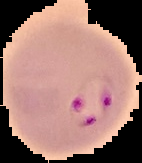

In [33]:
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png")

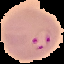

In [34]:
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png",target_size = (64,64))

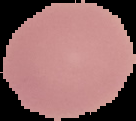

In [35]:
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_2.png")

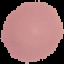

In [36]:
load_img("/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_2.png",target_size = (64,64))

In [37]:
os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(102)

In [38]:
image_dir = "/kaggle/input/malarial-cell-image/Malarial Cell Image Data /malarial_cell_image_data/cell_images/cell_images/"
size = 64
dataset = []
label = []

In [46]:
parasitized_img = os.listdir(image_dir+"Parasitized/")

for i, img_name in enumerate(tqdm(parasitized_img)):
    if (img_name.split(".")[1] == "png"):
        image = cv.imread(image_dir+"Parasitized/"+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)
        

  0%|          | 0/13780 [00:00<?, ?it/s]

In [47]:
len(parasitized_img)

13780

In [48]:
uninfected_img = os.listdir(image_dir+"Uninfected/")

for i, img_name in enumerate(tqdm(uninfected_img)):
    if (img_name.split(".")[1] == "png"):
        image = cv.imread(image_dir+"Uninfected/"+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [49]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2,random_state = 102)

In [50]:
Input_shape = (size,size,3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512,activation="relu")(flat)
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3)
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)

In [51]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy'])
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [52]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False)

Epoch 1/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 129s 234ms/step - accuracy: 0.7663 - loss: 0.5457 - val_accuracy: 0.8873 - val_loss: 0.4616
Epoch 2/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 142s 234ms/step - accuracy: 0.9369 - loss: 0.1878 - val_accuracy: 0.9122 - val_loss: 0.3454
Epoch 3/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 140s 230ms/step - accuracy: 0.9492 - loss: 0.1543 - val_accuracy: 0.9302 - val_loss: 0.2768
Epoch 4/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 123s 232ms/step - accuracy: 0.9543 - loss: 0.1350 - val_accuracy: 0.9480 - val_loss: 0.1670
Epoch 5/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 125s 236ms/step - accuracy: 0.9570 - loss: 0.1256 - val_accuracy: 0.9578 - val_loss: 0.1434
Epoch 6/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 122s 229ms/step - accuracy: 0.9618 - loss: 0.1118 - val_accuracy: 0.9621 - val_loss: 0.1223
Epoch 7/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 124s 234ms/step - accuracy: 0.9639 - loss: 0.1047 - val_accuracy: 0.9610 - val_loss: 0.1104
Epoch 8/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 123s 233ms/step - accuracy: 0.9668 -

In [53]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

295/295 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9667 - loss: 0.1022
Test accuracy: 97.11%


In [54]:
model.save('/kaggle/working/malaria_cell_detection.h5')


In [55]:
import os

if os.path.exists('/kaggle/working/malaria_cell_detection.h5'):
    print("Model saved successfully!")
else:
    print("Model not found.")

Model saved successfully!
